https://archive.ics.uci.edu/dataset/53/iris

3 classes: Setosa, Versicolor, Virginica
(Label info are given)

Each class: 50 samples

4 features: SL, PL, SW, PW



In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
iris = load_iris()

In [6]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [7]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


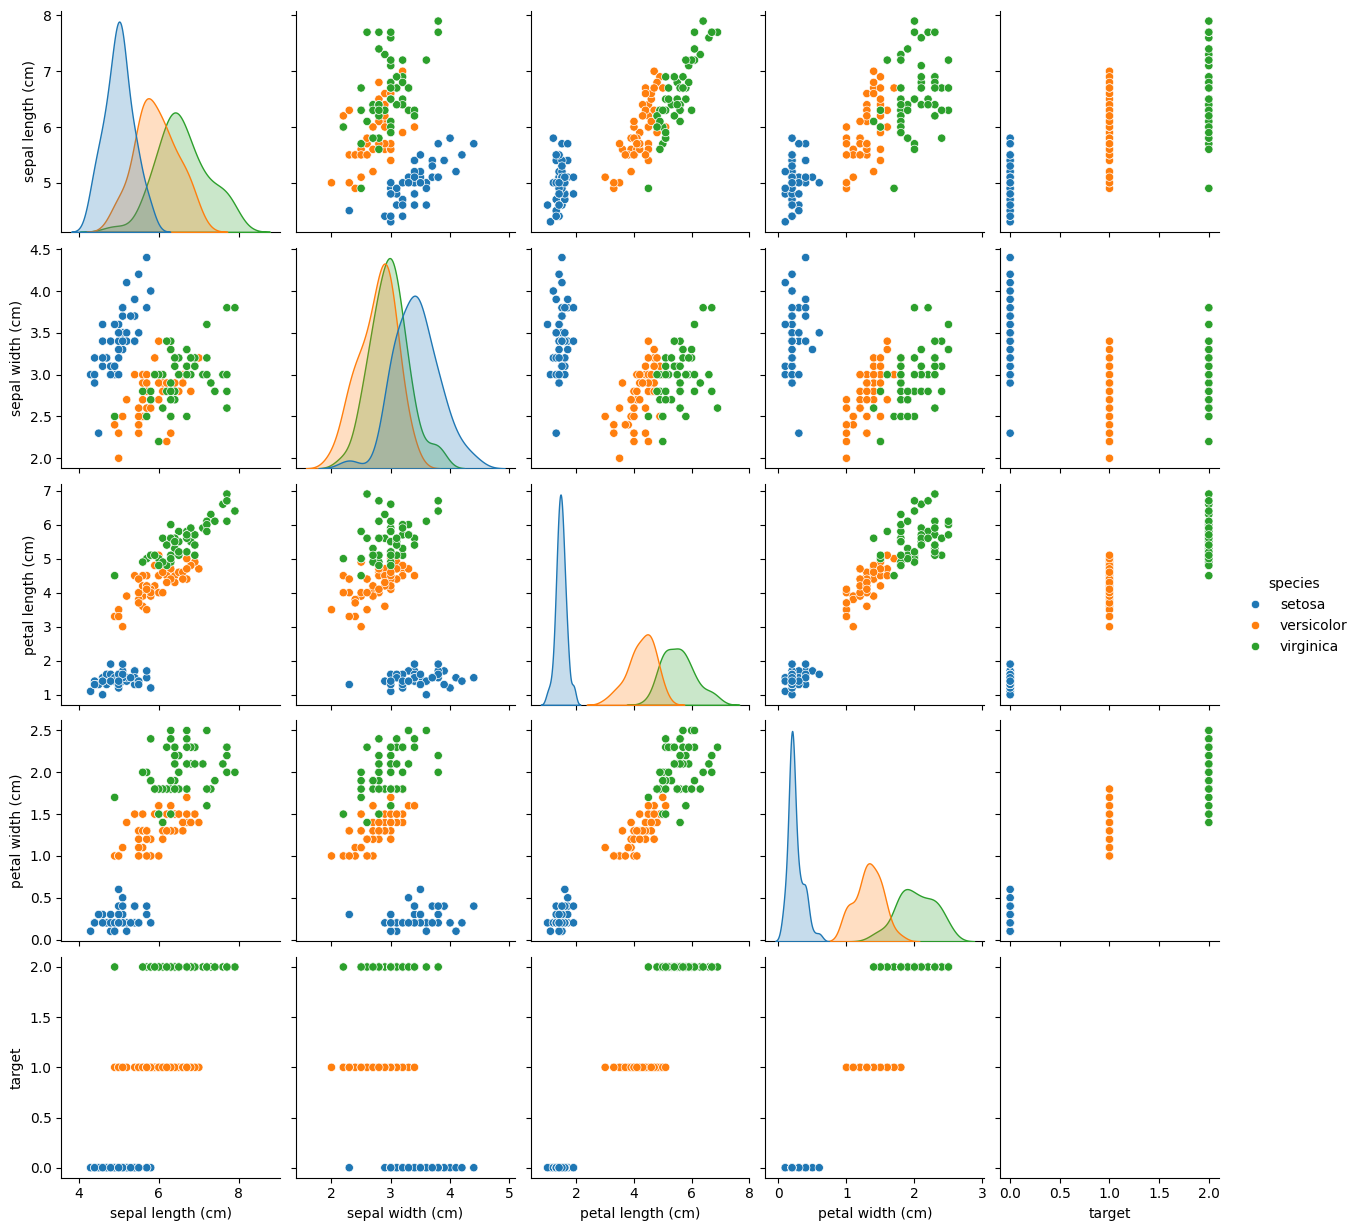

In [8]:
sns.pairplot(df, hue='species')
plt.show()

In [10]:
X = df[iris.feature_names]      # 4-dimensional feature vector
y = df['target']                # labels

In [11]:
# train : test = 7 : 3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Decision Tree**

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
model_DT = DecisionTreeClassifier()
model = model_DT

In [16]:
model.fit(X_train, y_train)   #training
y_pred = model.predict(X_test)  # testing

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



https://en.wikipedia.org/wiki/Confusion_matrix

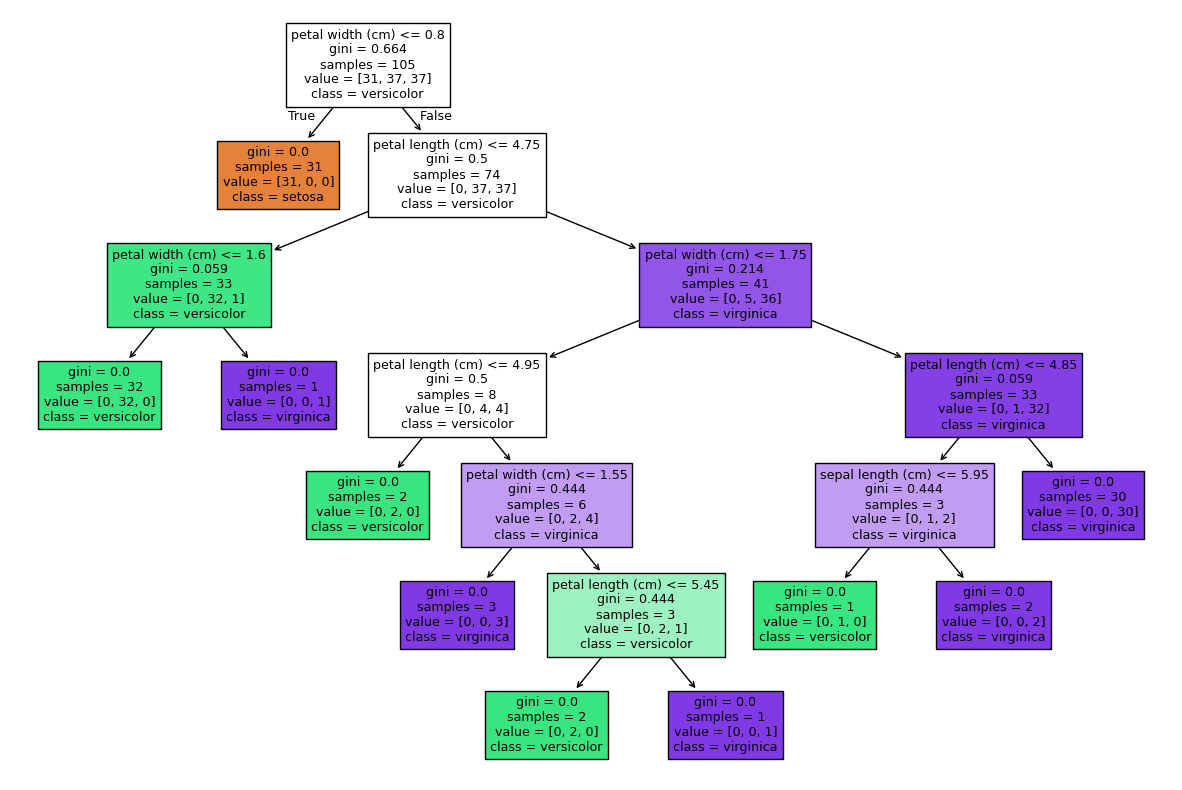

In [18]:
plt.figure(figsize=(15,10))
plot_tree(model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

# **KNN**

In [20]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier()
model = model_KNN

In [21]:
model.fit(X_train, y_train)   #training
y_pred = model.predict(X_test)  # testing

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [22]:
# visualize decision boundary of KNN

from matplotlib.colors import ListedColormap
X_vis = X.iloc[: , [0,2]]
y_vis = y
X_vis_train, X_vis_test, y_vis_train, y_vis_test = train_test_split(X_vis, y_vis, test_size=0.3, random_state=42)

In [23]:
knn_vis = KNeighborsClassifier(n_neighbors=3)
knn_vis.fit(X_vis_train, y_vis_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
x_min, xmax = X_vis.iloc[:, 0].min() - 1, X_vis.iloc[:, 0].max() + 1
y_min, y_max = X_vis.iloc[:, 1].min() - 1, X_vis.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, xmax, 0.1), np.arange(y_min, y_max, 0.1))
Z= knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


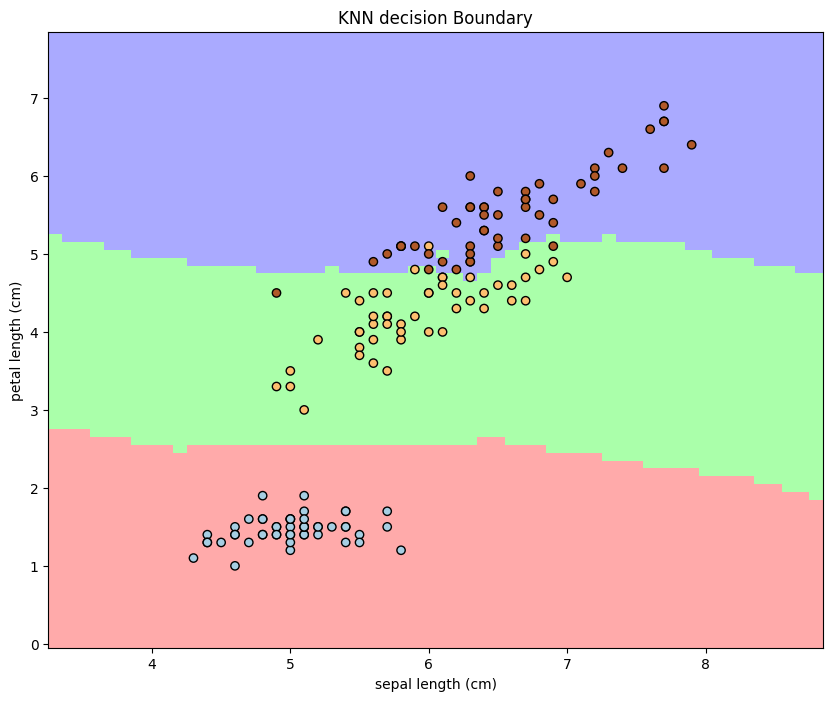

In [26]:
plt.figure(figsize=(10,8))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_vis.iloc[:, 0], X_vis.iloc[:, 1], c=y, cmap=plt.cm.Paired, edgecolor='k')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.title('KNN decision Boundary')
plt.show()

# **Logistic Regression**

In [27]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()
model = model_LR

In [28]:
model.fit(X_train, y_train)   #training
y_pred = model.predict(X_test)  # testing

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# **SVM (Support Vector Machine)**

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [33]:
from sklearn.svm import SVC
model_SVM = SVC(kernel='rbf')
model = model_SVM

In [34]:
model.fit(X_train, y_train)   #training
y_pred = model.predict(X_test)  # testing

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# **Neural Network**

In [35]:
from sklearn.neural_network import MLPClassifier
model_NN = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000)
model = model_NN

In [36]:
model.fit(X_train, y_train)   #training
y_pred = model.predict(X_test)  # testing

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [48]:
from tensorflow.keras import layers, models

#model creation
model = models.Sequential([
    layers.Dense(10, activation='relu', input_shape=(4,) ),
    layers.Dense(10, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#train
history = model.fit(X_train, y_train, epochs=500, validation_split=0.1,
                    verbose=1, batch_size=16)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.3478 - loss: 1.2934 - val_accuracy: 0.1818 - val_loss: 1.3070
Epoch 2/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2889 - loss: 1.2581 - val_accuracy: 0.0909 - val_loss: 1.2381
Epoch 3/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1439 - loss: 1.2064 - val_accuracy: 0.0000e+00 - val_loss: 1.1771
Epoch 4/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0469 - loss: 1.1391 - val_accuracy: 0.0000e+00 - val_loss: 1.1197
Epoch 5/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1246 - loss: 1.1042 - val_accuracy: 0.3636 - val_loss: 1.0920
Epoch 6/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2796 - loss: 1.0987 - val_accuracy: 0.4545 - val_loss: 1.0766
Epoch 7/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3250 - loss: 1.0839 - val_accuracy: 0.4545 - val_loss: 1.0716
Epoch 8/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3165 - loss: 1.0810 - val_accuracy: 0.4545 - v

In [49]:
#evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 0.1669
Test accuracy: 1.0


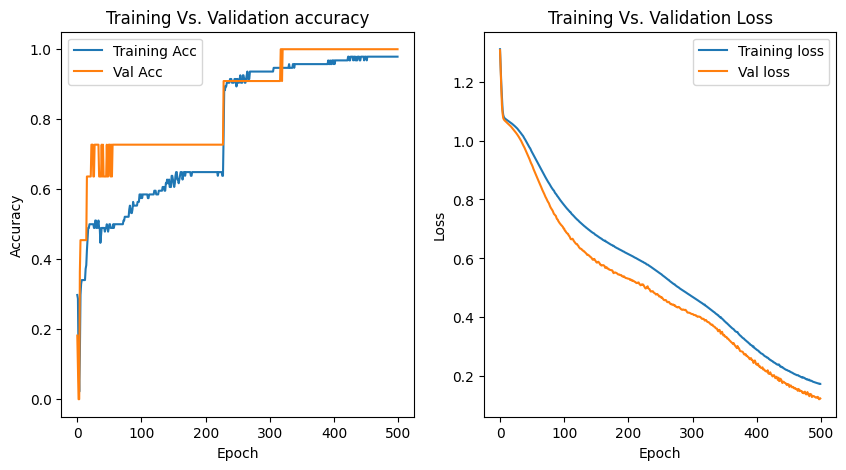

In [50]:
plt.figure(figsize=(10,5))


plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Training Vs. Validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.title('Training Vs. Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()


plt.show()

# **K-Means Clustering**

For unsupervised learning, we are still using iris dataset by discarding the label info. Only using features

In [53]:
from sklearn.cluster import KMeans

In [51]:
X = iris.data   # features

X.shape

(150, 4)

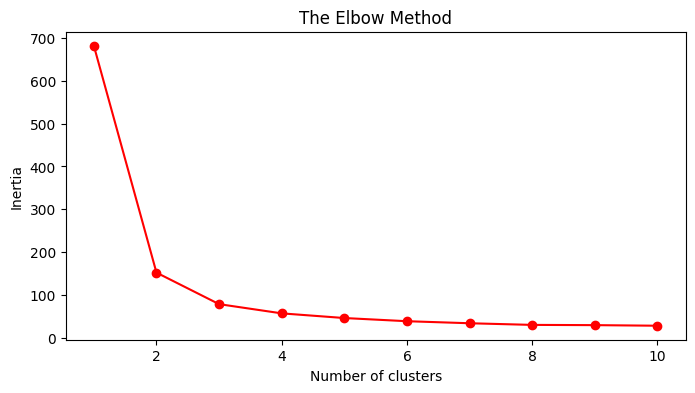

In [55]:
# determine the k value (Elbow method)

inertia = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(range(1,11), inertia, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [56]:
k = 3 # by looking into the above plot

In [57]:
model = KMeans(n_clusters=k, random_state=42)
model.fit(X)  # we are passing only the features

KMeans(n_clusters=3, random_state=42)

In [58]:
y = model.predict(X)
print(y)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [59]:
print(model.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


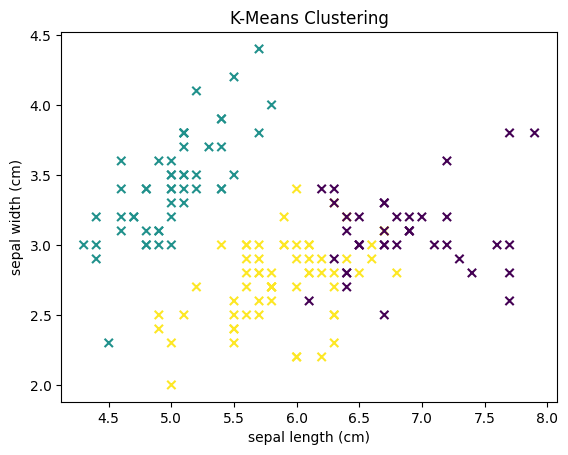

In [61]:
plt.scatter(X[:,0], X[:,1], c=model.labels_, marker = 'x')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('K-Means Clustering')
plt.show()

In [63]:
# model performance : quantitative

from sklearn.metrics import silhouette_score as SS

print( SS(X, model.labels_) )

# high value, near to 1 is better

0.551191604619592


# **Hierarchical Clustering**

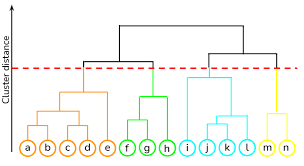

In [64]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import metrics
from scipy.spatial.distance import pdist, squareform

In [65]:
row_clusters = linkage(pdist(X, metric='euclidean'), method='complete')

pd.DataFrame(row_clusters,
             columns = ['row1', 'row2', 'distance', 'item_count_in_cluster'],
             index = ['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])

,row1,row2,distance,item_count_in_cluster
cluster 1,101.0,142.0,0.000000,2.0
cluster 2,7.0,39.0,0.100000,2.0
cluster 3,0.0,17.0,0.100000,2.0
cluster 4,9.0,34.0,0.100000,2.0
cluster 5,128.0,132.0,0.100000,2.0
...,...,...,...,...
cluster 145,284.0,292.0,2.236068,60.0
cluster 146,287.0,288.0,2.428992,50.0
cluster 147,290.0,294.0,3.210919,72.0
cluster 148,293.0,295.0,4.024922,78.0


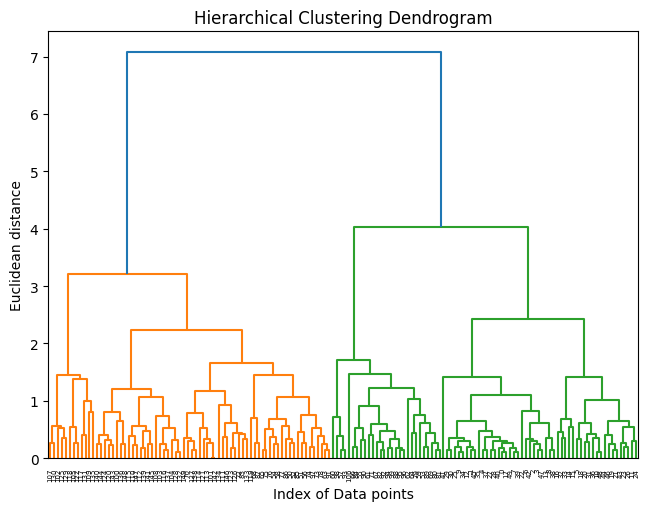

In [67]:
rd = dendrogram(row_clusters)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.xlabel('Index of Data points')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

https://scikit-learn.org/stable/modules/clustering.html